In [1]:
import numpy as np

from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('ha_measures.csv')
df_300 = pd.read_csv('ha_measures_300.csv')
df_600 = pd.read_csv('ha_measures_600.csv')
df_900 = pd.read_csv('ha_measures_900.csv')

In [5]:
df.sort_values(by=['R2_300'], inplace=True)
print(df[['R2_300', 'Material']])

       R2_300 Material
57  -1.907884     GaSb
172 -1.000000      Xe4
87  -1.000000   TaTlPt
122 -1.000000      Ar4
121  0.433540     AgCl
28   0.534301  C4AgBN4
53   0.601441     CuCl
30   0.666304     AgBr
61   0.716214   LaCoTe
31   0.751161      AgI
38   0.753794   BaBrCl
46   0.771179   Br4Cu4
60   0.779536     KYSn
135  0.783288     CdF2
176  0.787281   CsPbI3
111  0.787320   BaLiF3
157  0.792395      NaF
129  0.800965   Br4Cs4
156  0.808294     NaCl
18   0.814264      LiI
155  0.816909     NaBr
163  0.821093     RbBr
159  0.826056  NaLi2Sb
144  0.828553      KBr
158  0.832959      NaI
136  0.837593     CeO2
17   0.841700     LiBr
29   0.841921     I4Sn
139  0.845350     CsCl
130  0.848422   Br4Li4
..        ...      ...
90   0.965660   TiCoSb
97   0.965700   TiTeRu
131  0.965782    Ca4S4
14   0.966369    In2N2
94   0.966957   TiSiPd
96   0.967107   TiSnPt
106  0.967609   ZrSbRh
174  0.967735       Ge
9    0.967984       BN
95   0.968166   TiSiPt
107  0.969331   ZrSiPd
93   0.9693

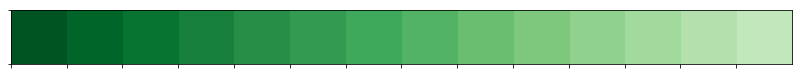

In [6]:
dx = 0.05
xs = np.arange(0.3, 0.99, dx)

palette = 'Greens_r'

# Skip the brightest colors
skip_n_colors = 4

colors = sns.color_palette(palette, len(xs) + skip_n_colors)

sns.palplot(colors[:-skip_n_colors])

/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


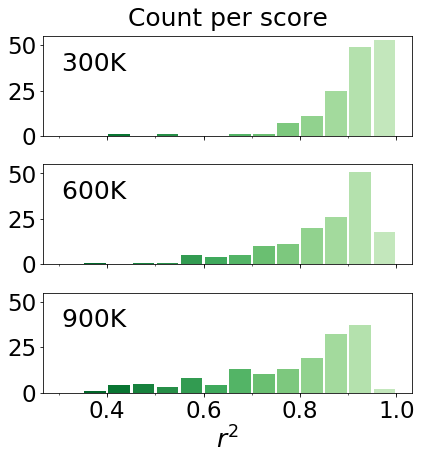

In [60]:
fig, axs = plt.subplots(figsize=(6, 6.5), nrows=3, sharex=True)

data = pd.DataFrame({
    ' 300K': df.R2_300,
    ' 600K': df.R2_600,
    ' 900K': df.R2_900,
})

fontsize = 25

for ii, label in enumerate(list(data)):
    ax = axs[ii]
    
    # if ii > 0:
    #     ax.text(0.5, 15, 'Mock data', fontsize=20)
    
    x = data[label]

    for nn, xx in enumerate(xs):
        common_settings = {
            'bins': 1,
            'range': [xx+dx*.05, xx+dx*.95],
            'color': colors[nn],
        }
    
        x[(x >= xx) & (x < xx + dx)].hist(ax=ax, **common_settings)


    ax.grid('off')

#     ax.set_ylabel(label, size=fontsize, rotation=0)
#     ax.yaxis.set_label_coords(.075, .76)
    ax.annotate(label, xy=(0.29, 36), size=fontsize)

    ax.tick_params(labelsize=fontsize-2)
    
    ax.yaxis.set_ticks(np.arange(0, 55, 25))
    ax.xaxis.set_ticks(np.arange(0.3, 1.1, .1), minor=True)
    
    ax.set_ylim([0, 55])
    
# ax.set_ylabel("Count", size=fontsize)
ax.yaxis.set_label_coords(-.15, .52)
    
fig.subplots_adjust(bottom=.2, left=.2)

axs[0].set_title('Count per score', fontsize=fontsize, y=1.04)
    
    # ax.yaxis.set_ticklabels(['' for t in ax.yaxis.get_ticklabels()])
    
    # ax.set_yscale('log')

axs[-1].set_xlabel('$r^2$', size=fontsize)
    
fig.tight_layout()

In [61]:
# fig.savefig('histogram.pdf')
fig.savefig('histogram.png', dpi=300)

In [15]:
df.sort_values(by=['R2_900'], inplace=True)
print(df.R2_900,df.Material)

57    -1.827477
13    -1.000000
61    -1.000000
136   -1.000000
87    -1.000000
172    0.009851
122    0.011413
113    0.095472
121    0.105369
28     0.259313
176    0.350107
53     0.381110
38     0.407848
30     0.414200
157    0.420144
111    0.434492
156    0.449739
155    0.461136
60     0.462034
31     0.471808
46     0.474086
135    0.477811
129    0.511382
158    0.520801
163    0.530433
165    0.556719
139    0.563405
144    0.569083
159    0.575004
140    0.577161
         ...   
2      0.920032
90     0.920842
93     0.921947
174    0.923841
105    0.925583
34     0.925837
97     0.926976
107    0.927652
75     0.928157
47     0.930284
92     0.930722
22     0.934891
25     0.935210
10     0.936299
9      0.937713
108    0.938008
86     0.939346
36     0.939394
74     0.944259
4      0.945080
45     0.946796
58     0.947018
84     0.947537
85     0.948571
7      0.949465
39     0.949588
27     0.949844
83     0.950296
44     0.954994
173    0.966941
Name: R2_900, Length: 17